In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

data=pd.read_csv('/content/creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import pandas as pd
data=pd.read_csv('/content/creditcard.csv')

data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
204076,135100.0,2.126725,-0.105402,-1.510722,0.165252,0.376540,-0.534798,0.131359,-0.228139,0.648901,...,-0.355017,-0.888680,0.220120,-1.069895,-0.181889,0.266874,-0.070569,-0.071622,1.98,0.0
204077,135100.0,-0.582696,2.109869,0.699058,4.350850,0.524572,0.436313,0.671204,0.087439,-1.980439,...,-0.131965,-0.288737,0.194044,1.115286,-0.979408,-0.089576,-0.227109,0.015287,13.26,0.0
204078,135101.0,1.988614,-0.207240,-0.259236,0.440332,-0.592331,-0.694481,-0.372261,-0.152909,1.108784,...,-0.170658,-0.280954,0.351013,-0.037285,-0.381279,-0.624344,0.042626,-0.028725,7.47,0.0
204079,135102.0,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802053,...,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,108.51,1.0
204080,135102.0,0.245859,0.925437,-0.542877,-0.891049,1.585514,0.074328,1.095022,-0.146891,-0.213699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204081 entries, 0 to 204080
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    204081 non-null  float64
 1   V1      204081 non-null  float64
 2   V2      204081 non-null  float64
 3   V3      204081 non-null  float64
 4   V4      204081 non-null  float64
 5   V5      204081 non-null  float64
 6   V6      204081 non-null  float64
 7   V7      204081 non-null  float64
 8   V8      204081 non-null  float64
 9   V9      204081 non-null  float64
 10  V10     204081 non-null  float64
 11  V11     204081 non-null  float64
 12  V12     204080 non-null  float64
 13  V13     204080 non-null  float64
 14  V14     204080 non-null  float64
 15  V15     204080 non-null  float64
 16  V16     204080 non-null  float64
 17  V17     204080 non-null  float64
 18  V18     204080 non-null  float64
 19  V19     204080 non-null  float64
 20  V20     204080 non-null  float64
 21  V21     20

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data['Class'].value_counts()

,count
Class,
0.0,203688
1.0,392


In [ ]:
legit=data[data.Class==0]
fraud=data[data.Class==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(203688, 31)
(392, 31)


In [ ]:
legit.Amount.describe()

,Amount
count,203688.000000
mean,89.698841
std,248.388033
min,0.000000
25%,5.990000
50%,23.000000
75%,79.190000
max,19656.530000


In [ ]:
fraud.Amount.describe()

,Amount
count,392.000000
mean,123.485765
std,257.455297
min,0.000000
25%,1.000000
50%,12.310000
75%,105.915000
max,2125.870000


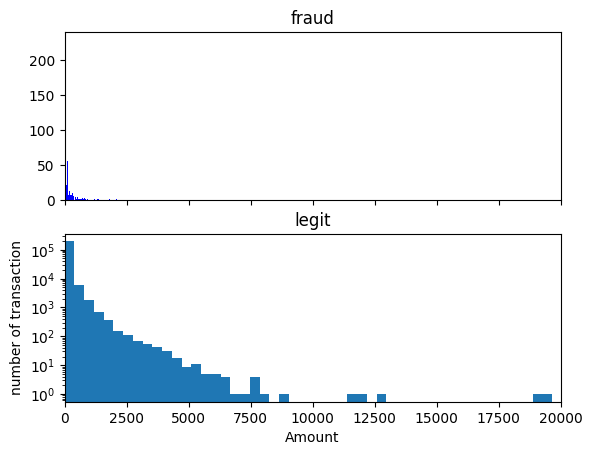

In [ ]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
plt.title('amount per transaction by class')
bins=50
ax1.hist(fraud.Amount,bins=bins,color='blue')
ax1.set_title('fraud')
ax2.hist(legit.Amount,bins=bins)
ax2.set_title('legit')
plt.xlabel('Amount')
plt.ylabel('number of transaction')
plt.xlim([0,20000])
plt.yscale('log')
plt.show();

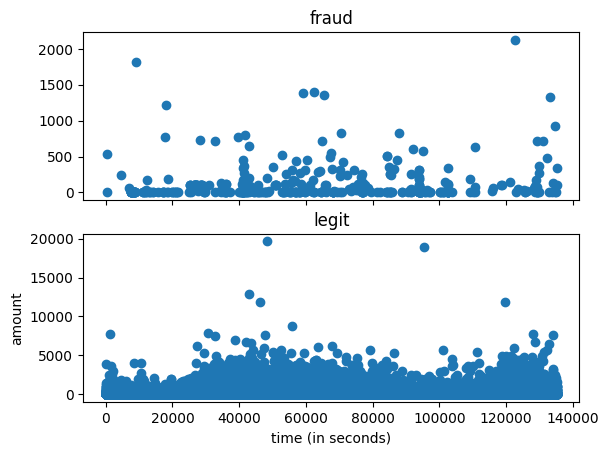

In [ ]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
plt.title('time of transaction vs amount by class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('fraud')
ax2.scatter(legit.Time,legit.Amount)
ax2.set_title('legit')
plt.xlabel('time (in seconds)')
plt.ylabel('amount')
plt.show()

In [ ]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,71931.358926,-0.085236,-0.006647,0.310657,0.061002,-0.094003,0.045763,-0.032985,0.012967,0.013841,...,0.017287,-0.014904,-0.042991,-0.014317,0.004019,0.057168,0.005541,0.001063,0.001671,89.698841
1.0,62596.510204,-5.586024,4.158763,-7.671289,4.751863,-4.024293,-1.396896,-6.519177,0.663336,-2.750902,...,0.395749,0.777634,-0.016690,-0.047536,-0.065304,0.066588,0.038878,0.181626,0.059742,123.485765


In [ ]:
legit_sample=legit.sample(n=492)

In [ ]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
17145,28476.0,0.962240,-0.360737,-0.462865,0.989981,0.601474,1.184419,0.115038,0.210344,0.146913,...,-0.076641,-0.346917,-0.415295,-1.684942,0.807144,-0.238279,0.005661,0.013481,154.00,0.0
189243,128319.0,-0.083910,1.851455,-0.105077,4.147428,1.512372,0.810200,1.014242,-0.128661,-2.035635,...,0.327107,1.140459,-0.336983,0.143011,-0.200990,0.644878,0.173212,0.274779,5.00,0.0
54654,46543.0,-0.483426,0.401605,0.931243,-1.102896,0.198645,-0.770956,0.489198,-0.275902,-1.795169,...,0.212187,0.452237,-0.483860,-0.290371,0.704567,0.082700,-0.118081,0.073894,12.00,0.0
193623,130217.0,2.130842,0.473726,-2.568372,0.353352,1.039790,-1.404590,0.807045,-0.540173,-0.208170,...,0.005151,0.146791,0.025632,0.640573,0.306681,0.583449,-0.098537,-0.044145,3.93,0.0
122765,76678.0,-1.286029,-0.053331,3.092915,0.794748,-1.300712,1.435834,-0.740994,0.508390,0.213116,...,-0.528019,-0.139510,-0.180416,0.198321,0.228595,-0.093668,0.488123,0.129821,50.00,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
203324,134766.0,-0.079653,3.222010,-3.724201,6.037345,0.583395,-0.691346,-1.799885,-2.627781,-4.001338,...,-0.664694,1.138556,-0.350753,-0.287467,0.808889,0.823962,0.668497,0.595610,1.00,1.0
203328,134769.0,-0.967767,2.098019,-5.222929,6.514573,-4.187674,2.114178,0.948701,-2.448427,-3.203666,...,-0.843268,0.796739,1.314312,-0.352887,-1.770706,0.098133,0.956769,0.162777,925.31,1.0
203700,134928.0,1.204934,3.238070,-6.010324,5.720847,1.548400,-2.321064,-0.781880,0.076619,-2.976249,...,0.098341,-0.845866,-0.031228,0.421146,0.388361,0.056035,0.491828,0.340847,0.00,1.0
204064,135095.0,0.232512,0.938944,-4.647780,3.079844,-1.902655,-1.041408,-1.020407,0.547069,-1.105990,...,0.911373,1.042929,0.999394,0.901260,-0.452093,0.192959,0.180859,-0.029315,345.00,1.0
204079,135102.0,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802053,...,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,108.51,1.0


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,392


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,73202.993902,-0.061466,0.028495,0.282251,0.151625,-0.006584,-0.073998,0.019195,0.061122,-0.031248,...,-0.011901,0.047660,-0.03294,0.011094,0.001367,0.056382,0.012236,0.015149,0.025915,78.346037
1.0,62596.510204,-5.586024,4.158763,-7.671289,4.751863,-4.024293,-1.396896,-6.519177,0.663336,-2.750902,...,0.395749,0.777634,-0.01669,-0.047536,-0.065304,0.066588,0.038878,0.181626,0.059742,123.485765


In [ ]:
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
17145    28476.0  0.962240 -0.360737 -0.462865  0.989981  0.601474  1.184419   
189243  128319.0 -0.083910  1.851455 -0.105077  4.147428  1.512372  0.810200   
54654    46543.0 -0.483426  0.401605  0.931243 -1.102896  0.198645 -0.770956   
193623  130217.0  2.130842  0.473726 -2.568372  0.353352  1.039790 -1.404590   
122765   76678.0 -1.286029 -0.053331  3.092915  0.794748 -1.300712  1.435834   
...          ...       ...       ...       ...       ...       ...       ...   
203324  134766.0 -0.079653  3.222010 -3.724201  6.037345  0.583395 -0.691346   
203328  134769.0 -0.967767  2.098019 -5.222929  6.514573 -4.187674  2.114178   
203700  134928.0  1.204934  3.238070 -6.010324  5.720847  1.548400 -2.321064   
204064  135095.0  0.232512  0.938944 -4.647780  3.079844 -1.902655 -1.041408   
204079  135102.0  1.862102 -0.124052 -1.989752  0.382609  0.473032 -0.674517   

              V7        V8        V9  .

In [ ]:
print(y)

17145     0.0
189243    0.0
54654     0.0
193623    0.0
122765    0.0
         ... 
203324    1.0
203328    1.0
203700    1.0
204064    1.0
204079    1.0
Name: Class, Length: 884, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(884, 30) (707, 30) (177, 30)


In [ ]:
model=LogisticRegression(max_iter=1000)

In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model=LogisticRegression(max_iter=1000)
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

In [ ]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy :',test_data_accuracy)

accuracy : 0.559322033898305


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
fraud_cases=y.value_counts()[1]
valid_cases=y.value_counts()[0]
outlier_fraction=fraud_cases/float(valid_cases)
print('outlier fraction :',outlier_fraction)

outlier fraction : 0.7967479674796748


In [ ]:
state=42
classifiers={
    'Isolation forest':IsolationForest(n_estimators=100,max_samples=len(x),
   contamination='auto',random_state=state,verbose=0 ),
    # 'local outlier factor':LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None,contamination=outlier_fraction),
    'support vector machine':OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1)
}

In [ ]:
type(classifiers)

dict

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

data=pd.read_csv('/content/creditcard.csv')
legit=data[data.Class==0]
fraud=data[data.Class==1]
legit_sample=legit.sample(n=492)
new_dataset=pd.concat([legit_sample,fraud],axis=0)
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

state=42
classifiers={
    'Isolation forest':IsolationForest(n_estimators=100,max_samples=len(x),
   contamination='auto',random_state=state,verbose=0 ),
    # 'local outlier factor':LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None,contamination=outlier_fraction),
    'support vector machine':OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1)
}

n_outliers=len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
  if clf_name=='local outlier factor':
    y_pred=clf.fit_predict(x)
    scores_prediction=clf.negative_outlier_factor_
  elif clf_name=='support vector machine':
    clf.fit(x)
    y_pred=clf.predict(x)
  else:
    clf.fit(x)
    scores_prediction=clf.decision_function(x)
    y_pred=clf.predict(x)
  y_pred[y_pred==1]=0
  y_pred[y_pred==-1]=1
  n_errors=(y_pred !=y).sum()
  print('{}:{}'.format(clf_name,n_errors))
  print('accuracy score :')
  print(accuracy_score(y,y_pred))
  print('classification report :')
  print(classification_report(y,y_pred))

Isolation forest:17
accuracy score :
0.9671179883945842
classification report :
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       492
         1.0       0.61      0.88      0.72        25

    accuracy                           0.97       517
   macro avg       0.80      0.93      0.85       517
weighted avg       0.98      0.97      0.97       517

support vector machine:187
accuracy score :
0.6382978723404256
classification report :
              precision    recall  f1-score   support

         0.0       0.97      0.64      0.77       492
         1.0       0.07      0.56      0.13        25

    accuracy                           0.64       517
   macro avg       0.52      0.60      0.45       517
weighted avg       0.92      0.64      0.74       517



In [ ]:
best_model = classifiers["Isolation forest"]

In [ ]:
state=42
classifiers={
    'Isolation forest':IsolationForest(n_estimators=100,max_samples=len(x),
   contamination='auto',random_state=state,verbose=0 ),
    # 'local outlier factor':LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None,contamination=outlier_fraction),
    'support vector machine':OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1)
}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

data=pd.read_csv('/content/creditcard.csv')
legit=data[data.Class==0]
fraud=data[data.Class==1]
legit_sample=legit.sample(n=492)
new_dataset=pd.concat([legit_sample,fraud],axis=0)
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

state=42
classifiers={
    'Isolation forest':IsolationForest(n_estimators=100,max_samples=len(x),
   contamination='auto',random_state=state,verbose=0 ),
    # 'local outlier factor':LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None,contamination=outlier_fraction),
    'support vector machine':OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1)
}

In [ ]:
state=42
classifiers={
    'Isolation forest':IsolationForest(n_estimators=100,max_samples=len(x),
   contamination='auto',random_state=state,verbose=0 ),
    # 'local outlier factor':LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None,contamination=outlier_fraction),
    'support vector machine':OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1)
}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

data=pd.read_csv('/content/creditcard.csv')
legit=data[data.Class==0]
fraud=data[data.Class==1]
legit_sample=legit.sample(n=492)
new_dataset=pd.concat([legit_sample,fraud],axis=0)
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

state=42
classifiers={
    'Isolation forest':IsolationForest(n_estimators=100,max_samples=len(x),
   contamination='auto',random_state=state,verbose=0 ),
    # 'local outlier factor':LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None,contamination=outlier_fraction),
    'support vector machine':OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1)
}

best_model = classifiers["Isolation forest"]